In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv
/kaggle/input/bank-marketing-dataset/bank-full.csv


# Task_3
## Objective
## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data 

In [4]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv(r"/kaggle/input/bank-marketing-dataset/bank.csv",sep=";") 
df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
#separating categorical and numerical columns 
cat=df.select_dtypes(include="object").columns 
num=df.select_dtypes(include="int64").columns 
cat,num 

(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object'),
 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))

### UNIVARIATE ANALYSIS ON CATEGORICAL FEATURES 

In [8]:
for col in cat:
    print(f"Unique value counts in the {col} columns are---")
    print(df[col].value_counts())
    print("\n======================================")
    


Unique value counts in the job columns are---
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

Unique value counts in the marital columns are---
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

Unique value counts in the education columns are---
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

Unique value counts in the default columns are---
default
no     4445
yes      76
Name: count, dtype: int64

Unique value counts in the housing columns are---
housing
yes    2559
no     1962
Name: count, dtype: int64

Unique value counts in the loan columns are---
loan
no     3830
yes     691
Name: count, dtype: int64

Unique value counts in the contact columns are---
con

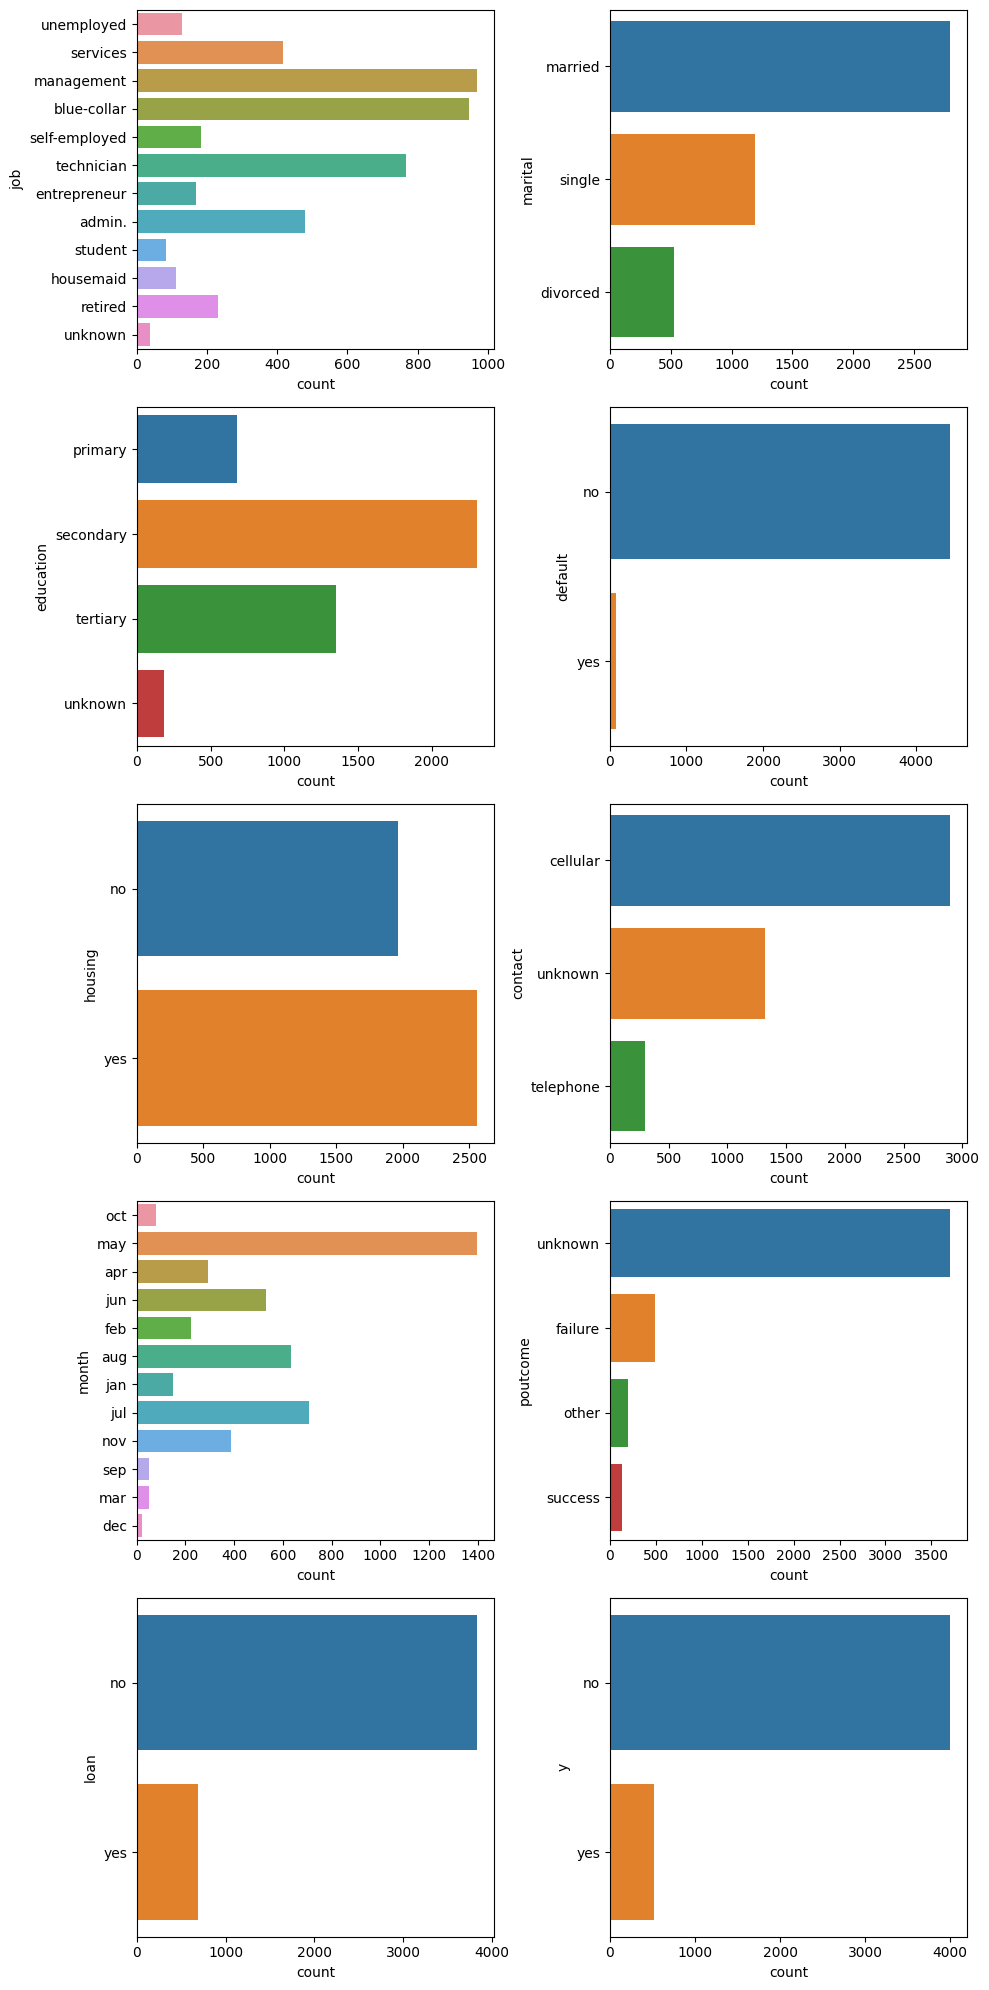

In [9]:
#visualizing the categorical columns 

plt.figure(figsize=(10,20)) 

plt.subplot(5,2,1)
sns.countplot(data=df,y="job")

plt.subplot(5,2,2)
sns.countplot(data=df,y='marital')

plt.subplot(5,2,3)
sns.countplot(data=df,y='education')

plt.subplot(5,2,4)
sns.countplot(data=df,y='default')

plt.subplot(5,2,5)
sns.countplot(data=df,y='housing')

plt.subplot(5,2,6)
sns.countplot(data=df,y='contact')

plt.subplot(5,2,7)
sns.countplot(data=df,y='month')

plt.subplot(5,2,8)
sns.countplot(data=df,y='poutcome')

plt.subplot(5,2,9)
sns.countplot(data=df,y='loan')

plt.subplot(5,2,10)
sns.countplot(data=df,y='y') 

plt.tight_layout()





**Job**

* **Unemployed:** This category has the lowest count, indicating a relatively small number of unemployed individuals in the dataset.
* **Services:** This category has a moderate count, suggesting a significant portion of individuals are employed in services.
* **Management:** This category has a high count, indicating a large number of individuals in management positions.
* **Blue-collar:** This category has a high count, suggesting a significant number of individuals in blue-collar occupations.
* **Self-employed:** This category has a moderate count, indicating a portion of individuals are self-employed.
* **Technician:** This category has a moderate count, suggesting a portion of individuals are employed as technicians.
* **Entrepreneur:** This category has a low count, indicating a relatively small number of entrepreneurs in the dataset.
* **Admin:** This category has a moderate count, suggesting a portion of individuals are employed in administrative roles.
* **Student:** This category has a low count, indicating a relatively small number of students in the dataset.
* **Housemaid:** This category has a low count, indicating a relatively small number of individuals employed as housemaids.
* **Retired:** This category has a low count, indicating a relatively small number of retired individuals in the dataset.
* **Unknown:** This category has a low count, indicating a relatively small number of individuals with unknown job information.

**Marital**

* **Married:** This category has the highest count, indicating a large number of individuals are married.
* **Single:** This category has a moderate count, suggesting a portion of individuals are single.
* **Divorced:** This category has the lowest count, indicating a relatively small number of individuals are divorced.

**Education**

* **Primary:** This category has a low count, indicating a relatively small number of individuals with primary education.
* **Secondary:** This category has a moderate count, suggesting a portion of individuals have secondary education.
* **Tertiary:** This category has the highest count, indicating a large number of individuals have tertiary education.
* **Unknown:** This category has a low count, indicating a relatively small number of individuals with unknown education level.

**Default**

* **No:** This category has the highest count, indicating a large number of individuals have not defaulted on their loans.
* **Yes:** This category has the lowest count, indicating a relatively small number of individuals have defaulted on their loans.

**Overall Observations**

* The dataset appears to be skewed towards individuals with tertiary education and in management or blue-collar occupations.
* The majority of individuals in the dataset are married.
* The default rate is relatively low, indicating a good creditworthines

**Housing**

* **No:** This category has a high count, indicating a significant number of individuals do not own a house.
* **Yes:** This category has a moderate count, suggesting a portion of individuals own a house.

**Contact**

* **Cellular:** This category has the highest count, indicating a large number of individuals were contacted via cellular phones.
* **Unknown:** This category has a moderate count, suggesting a portion of individuals' contact information was unknown.
* **Telephone:** This category has the lowest count, indicating a relatively small number of individuals were contacted via telephone.

**Month**

* **Oct:** This category has the highest count, indicating a large number of contacts were made in October.
* **May:** This category has a moderate count, suggesting a portion of contacts were made in May.
* **Apr:** This category has a moderate count, suggesting a portion of contacts were made in April.
* **Feb:** This category has a moderate count, suggesting a portion of contacts were made in February.
* **Jun:** This category has a moderate count, suggesting a portion of contacts were made in June.
* **Aug:** This category has a low count, indicating a relatively small number of contacts were made in August.
* **Jan:** This category has a low count, indicating a relatively small number of contacts were made in January.
* **Jul:** This category has a low count, indicating a relatively small number of contacts were made in July.
* **Nov:** This category has a low count, indicating a relatively small number of contacts were made in November.
* **Sep:** This category has a low count, indicating a relatively small number of contacts were made in September.
* **Mar:** This category has a low count, indicating a relatively small number of contacts were made in March.
* **Dec:** This category has the lowest count, indicating a relatively small number of contacts were made in December.

**Poutcome**

* **Unknown:** This category has the highest count, indicating a large number of individuals had unknown previous outcomes.
* **Failure:** This category has a moderate count, suggesting a portion of individuals had failed previous campaigns.
* **Other:** This category has a low count, indicating a relatively small number of individuals had other previous outcomes.
* **Success:** This category has the lowest count, indicating a relatively small number of individuals had successful previous campaigns.

**Overall Observations**

* The majority of individuals were contacted via cellular phones.
* A significant number of contacts were made in October and May.
* The previous outcome of the camp

**Loan**

* **No:** This category has the highest count, indicating a large number of individuals do not have a housing loan.
* **Yes:** This category has a low count, suggesting a small portion of individuals have a housing loan.

**y**

* **No:** This category has the highest count, indicating a large number of individuals did not subscribe to a term deposit.
* **Yes:** This category has a low count, suggesting a small portion of individuals subscribed to a term deposit.

**Overall Observations**

* The majority of individuals in the dataset do not have a housing loan.
* The majority of individuals did not subscribe to a feel free to ask!
the dataset in general, feel free to ask!
he dataset in general, feel free to ask! 


### UNIVARIATE ANAYSIS ON NUMERICAL FEATURES 


In [10]:
num 

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<Axes: xlabel='pdays', ylabel='Density'>

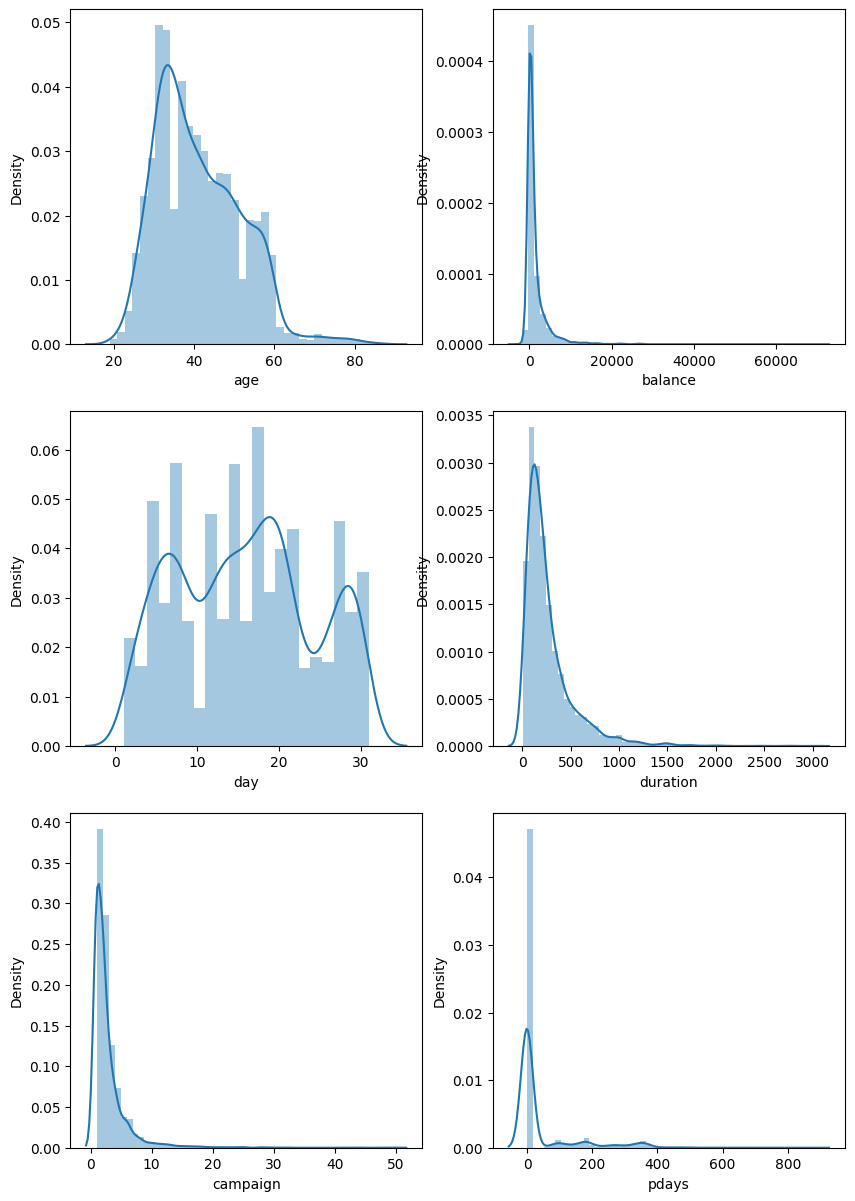

In [11]:
#visualizing the numerical  columns 

plt.figure(figsize=(10,20)) 

plt.subplot(4,2,1)
sns.distplot(df["age"])

plt.subplot(4,2,2)
sns.distplot(df["balance"])

plt.subplot(4,2,3)
sns.distplot(df["day"])

plt.subplot(4,2,4)
sns.distplot(df["duration"])

plt.subplot(4,2,5)
sns.distplot(df["campaign"])

plt.subplot(4,2,6)
sns.distplot(df['pdays']) 

<Axes: xlabel='previous', ylabel='Density'>

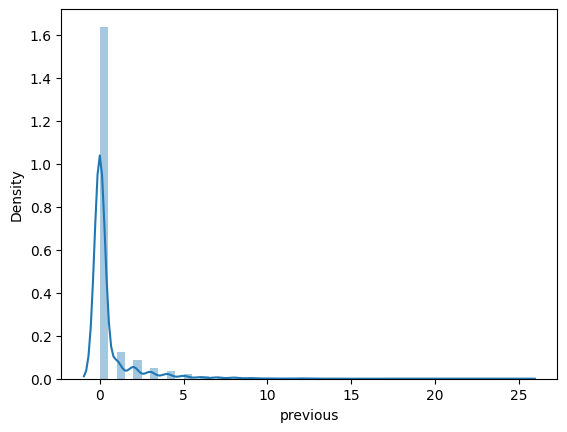

In [12]:
sns.distplot(df["previous"])



1. **Age**:
   - The distribution is right-skewed, with the majority of the values concentrated between 20 and 60 years. 
   - There are fewer observations for individuals older than 60.

2. **Balance**:
   - The balance feature is highly right-skewed. Most customers have low account balances, while only a few have very high balances.
   - A small number of extreme values (outliers) exist, which may require further exploration.

3. **Day**:
   - This represents the day of the month when the data was recorded. The distribution appears uniform, with peaks at certain days, likely reflecting when banking activity is higher (e.g., salary or transaction dates).

4. **Duration**:
   - The duration feature is also right-skewed. Most calls or interactions have short durations, while a few outliers have long durations.
   - Duration likely plays a significant role in predicting customer outcomes, as longer calls might indicate mo

3
1. **Campaign**:
   - This feature represents the number of contacts made during the current marketing campaign for a client.
   - The distribution is heavily **right-skewed**, with the majority of the values concentrated at lower numbers (1–3 contacts).
   - Very few clients were contacted more than 10 times, and the frequency declines rapidly for higher values. This suggests that most clients are contacted only a few times during campaig4s.

2. **Pdays**:
   - This feature indicates the number of days since the client was last contacted during a previous campaign. A value of **999** often represents that the client was never contacted before.
   - The distribution shows a very prominent peak at **999**, implying that a large proportion of clients were new to the campaign.
   - For other values, there is a right-skewed distribution, indicating that for the remaining clients who were contacted previously, the intervals vari

5. **Previous**
   
   - Skewed Distribution: The distribution of the "previous" variable is highly skewed to the right. This indicates that most individuals have been contacted a few times (likely only once), with a small number of individuals being contacted multiple times (up to 25 times).
   -  Mode: The mode of the distribution appears to be around 0, indicating that the most common value for the number of previous contacts is 0. This suggests that most individuals in the dataset have not been contacted before.
   -  Outliers: There are some outliers in the data, with a few individuals being contacted a large number of times (up to 25 times) e analysis or model performance.

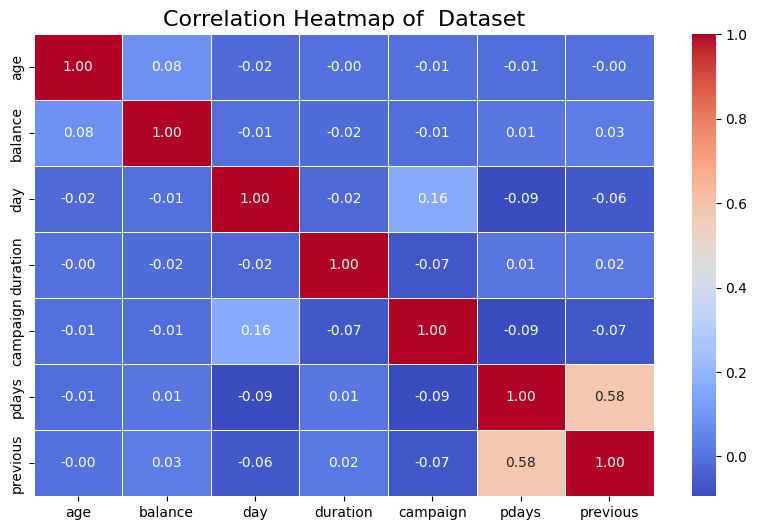

In [13]:
numerical_data = df.select_dtypes(include=["int64"])

# Computing the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    cmap="coolwarm",    
    fmt=".2f",           
    linewidths=0.5,    
    cbar=True            
)

# Adding titles
plt.title("Correlation Heatmap of  Dataset", fontsize=16)
plt.show() 


-----

### Key Observations:

1. **Diagonal Elements**:
   - The diagonal values are all 1.0 since a feature is perfectly correlated with itself.

2. **Notable Positive Correlations**:
   - **Pdays and Previous (0.58)**:
     - This is the strongest positive correlation in the heatmap. It indicates that clients who were contacted a certain number of days ago tend to have a higher count of previous contacts. This makes logical sense as both features relate to past campaign interactions.

3. **Weak to No Correlation**:
   - Most features exhibit weak or negligible correlations (close to 0) with each other. For instance:
     - **Age and Balance (0.08)**: Weak correlation; older clients may have slightly higher balances, but the relationship is not strong.
     - **Duration and Campaign (-0.07)**: Weak negative correlation, suggesting longer interactions slightly correlate with fewer contact attempts in the current campaign.
     - **Day and Campaign (0.16)**: There is a weak positive correlation indicating that the day of contact might slightly affect the number of contacts during a campaign.

4. **Negligible or Zero Correlations**:
   - Several features, such as **Age, Balance, and Day**, have near-zero correlations with other features, implying little to no linear relationship.

---

### Implications:
1. The lack of strong correlations between most features suggests they are mostly independent of one another.
2. **Duration**, despite having weak correlations, might still be highly predictive of campaign success (not visible in this matrix but observed in similar analyses), as longer durations often indicate higher client interest.
3. Features like **Pdays** and **Previous** are related and may require careful handling to avoid redundancy or muless its impact on target outcomes.

In [14]:
df.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
# separating input and output variables 
X=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']] 
y=df['y'] 

In [17]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)  

(3164, 16) (3164,)
(1357, 16) (1357,)


In [18]:
X_train.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,technician,married,secondary,no,56,yes,yes,cellular,29,jan,194,1,247,1,failure
3480,47,services,married,secondary,no,440,yes,no,unknown,12,jun,91,1,-1,0,unknown
2125,52,technician,married,secondary,no,3554,no,yes,cellular,8,jul,89,1,-1,0,unknown
3452,31,admin.,married,secondary,no,0,yes,no,cellular,29,jul,82,5,-1,0,unknown
1667,33,blue-collar,married,secondary,no,-346,yes,yes,unknown,23,may,29,3,-1,0,unknown


In [19]:
X_train.dtypes 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [20]:
X_train_cat=X_train.select_dtypes(include="object")
X_train_cat.head() 

,job,marital,education,default,housing,loan,contact,month,poutcome
565,technician,married,secondary,no,yes,yes,cellular,jan,failure
3480,services,married,secondary,no,yes,no,unknown,jun,unknown
2125,technician,married,secondary,no,no,yes,cellular,jul,unknown
3452,admin.,married,secondary,no,yes,no,cellular,jul,unknown
1667,blue-collar,married,secondary,no,yes,yes,unknown,may,unknown


In [21]:
X_train_num=X_train.select_dtypes(include="int64")
X_train_num.head()  

,age,balance,day,duration,campaign,pdays,previous
565,40,56,29,194,1,247,1
3480,47,440,12,91,1,-1,0
2125,52,3554,8,89,1,-1,0
3452,31,0,29,82,5,-1,0
1667,33,-346,23,29,3,-1,0


In [22]:
#Data preprocessing on numerical features 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#putting X_train num transformed into a dataframe
X_train_num_transformed=pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns=X_train_num.columns,
                                    index=X_train_num.index)


X_train_num_transformed.head() 

,age,balance,day,duration,campaign,pdays,previous
565,-0.099849,-0.446191,1.600764,-0.260180,-0.580450,2.031118,0.268405
3480,0.560088,-0.321995,-0.465764,-0.671881,-0.580450,-0.410063,-0.321751
2125,1.031471,0.685156,-0.952006,-0.679875,-0.580450,-0.410063,-0.321751
3452,-0.948339,-0.464302,1.600764,-0.707855,0.728562,-0.410063,-0.321751
1667,-0.759785,-0.576208,0.871401,-0.919701,0.074056,-0.410063,-0.321751


In [23]:
#one hot encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first', sparse=False)

X_train_cat_onehot=pd.DataFrame(encoder.fit_transform(X_train_cat),
                                     columns=encoder.get_feature_names_out(X_train_cat.columns),
                                     index=X_train_cat.index) 

X_train_cat_onehot.head()  

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3480,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X_train_transformed=pd.concat([X_train_num_transformed,X_train_cat_onehot],axis=1)
X_train_transformed.head()  

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
565,-0.099849,-0.446191,1.600764,-0.260180,-0.580450,2.031118,0.268405,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3480,0.560088,-0.321995,-0.465764,-0.671881,-0.580450,-0.410063,-0.321751,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2125,1.031471,0.685156,-0.952006,-0.679875,-0.580450,-0.410063,-0.321751,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3452,-0.948339,-0.464302,1.600764,-0.707855,0.728562,-0.410063,-0.321751,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1667,-0.759785,-0.576208,0.871401,-0.919701,0.074056,-0.410063,-0.321751,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
X_test_num=X_test.select_dtypes(include="int64")
X_test_num.head()   

,age,balance,day,duration,campaign,pdays,previous
4274,35,378,16,427,3,-1,0
72,31,6248,9,154,2,-1,0
1065,30,0,18,756,1,-1,0
3185,42,529,19,193,3,-1,0
130,41,168,18,187,3,-1,0


In [26]:
X_test_cat=X_test.select_dtypes(include="object")
X_test_cat.head() 

,job,marital,education,default,housing,loan,contact,month,poutcome
4274,blue-collar,married,primary,no,yes,no,unknown,may,unknown
72,management,single,tertiary,no,yes,no,unknown,may,unknown
1065,unemployed,married,tertiary,no,yes,no,cellular,nov,unknown
3185,admin.,married,secondary,no,yes,yes,cellular,nov,unknown
130,blue-collar,married,primary,no,yes,no,cellular,nov,unknown


In [27]:
#previously we ahave already created scaler object for StandardScaler,we will use only the transform

X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head() 

,age,balance,day,duration,campaign,pdays,previous
4274,-0.571232,-0.342047,0.020478,0.671143,0.074056,-0.410063,-0.321751
72,-0.948339,1.556468,-0.830446,-0.420064,-0.253197,-0.410063,-0.321751
1065,-1.042615,-0.464302,0.263599,1.986187,-0.580450,-0.410063,-0.321751
3185,0.088705,-0.293210,0.385159,-0.264177,0.074056,-0.410063,-0.321751
130,-0.005572,-0.409967,0.263599,-0.288160,0.074056,-0.410063,-0.321751


In [28]:
#one hot encoding the categorical features



X_test_cat_onehot=pd.DataFrame(encoder.transform(X_test_cat),
                                     columns=encoder.get_feature_names_out(X_test_cat.columns),
                                     index=X_test_cat.index) 

X_test_cat_onehot.head()  

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
72,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X_test_transformed=pd.concat([X_test_num_transformed,X_test_cat_onehot],axis=1)
X_test_transformed.head() 

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4274,-0.571232,-0.342047,0.020478,0.671143,0.074056,-0.410063,-0.321751,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
72,-0.948339,1.556468,-0.830446,-0.420064,-0.253197,-0.410063,-0.321751,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1065,-1.042615,-0.464302,0.263599,1.986187,-0.580450,-0.410063,-0.321751,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3185,0.088705,-0.293210,0.385159,-0.264177,0.074056,-0.410063,-0.321751,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
130,-0.005572,-0.409967,0.263599,-0.288160,0.074056,-0.410063,-0.321751,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [30]:
# using decision tree 
from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier()
classifier_tree.fit(X_train_transformed,y_train) 

DecisionTreeClassifier()

In [31]:
#for decision tree classifier 
y_test_pred_tree=classifier_tree.predict(X_test_transformed) 

In [32]:
from sklearn import metrics 

# for decision tree classifier model
print("for decision tree classifier model the accuracy is : ",metrics.accuracy_score(y_test,y_test_pred_tree))

for decision tree classifier model the accuracy is :  0.8680913780397936
